# Data Bootcamp Final Project - NFL Draft Analysis 

### Team Members: 

Harry Ingram, Ju Tan and Ben Coleman

### Project Summary: 

The recent occurance  of the NFL draft, and questionable trades that some teams made leading up to the draft, has lead to a lot of discussion of draft strategy in the media. This is of particular interest to our team as Harry is a Patriots fan, Ben is a Ravens fan and Ju is a Eagles fan (sorry, Ju).

Our team looked at NFL draft data over the last 20 years in order to try and find any patterns that might emerge. The source for our data is  http://www.pro-football-reference.com/. This website includes information around the draft order, position, team and many other fields. The most useful are those around the quality of play, number of years as a starter, number of games played in and the player information. The goal of this project overall will be to examine if players that are drafted higher do better in the NFL and any other anomalies we find. 

Warning: loading the data and a couple of the swarmplots is somewhat slow, and may take up to 5 minutes

### Outline: 

#### Section 1 - Setting up the data
     Section 1 A - Importing packages
     Section 1 B - Importing the data
     Section 1 C - Data cleanup
     Section 1 D - Aggregating data 

#### Section 2 - Are pick/round and performance correlated?
     
#### Section 3 - Does the "Jimmy Johnson" system work?

#### Section 4 - Does player position impact predictability? 

####  Section 5 -  Does age impact draft stock?

####  Section 6 - Which team has the best performance in the draft over the last 20 years?


--------------------------------------------------------------------------------------------------

### Section 1 - Setting up the data


#### Section 1 A - Importing packages 

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt 
%matplotlib inline
from bs4 import BeautifulSoup
import urllib.request
import sys                             
import matplotlib as mpl               

import seaborn as sns

# plotly imports
from plotly.offline import iplot, iplot_mpl  # plotting functions
import plotly.graph_objs as go               # ditto
import plotly                                # just to print version and init notebook
import cufflinks as cf                       # gives us df.iplot that feels like df.plot
cf.set_config_file(offline=True, offline_show_link=False)

# these lines make our graphics show up in the notebook
%matplotlib inline             
plotly.offline.init_notebook_mode()

#### Section 1 B - Importing the data
It is spread over many cells as this reduces the chance of internet connection timing out
1)  we create a list of lists. Each row in this cell grabs the first table on the website and puts the info into a list, it then adds that list to "Master list" which is a list of these lists.

In [2]:
master_list= []

master_list.append(pd.read_html("http://www.pro-football-reference.com/years/1995/draft.htm")[0])
master_list.append(pd.read_html("http://www.pro-football-reference.com/years/1996/draft.htm")[0])
master_list.append(pd.read_html("http://www.pro-football-reference.com/years/1997/draft.htm")[0])

In [3]:
master_list.append(pd.read_html("http://www.pro-football-reference.com/years/1998/draft.htm")[0])
master_list.append(pd.read_html("http://www.pro-football-reference.com/years/1999/draft.htm")[0])
master_list.append(pd.read_html("http://www.pro-football-reference.com/years/2000/draft.htm")[0])
master_list.append(pd.read_html("http://www.pro-football-reference.com/years/2001/draft.htm")[0])
master_list.append(pd.read_html("http://www.pro-football-reference.com/years/2002/draft.htm")[0])
master_list.append(pd.read_html("http://www.pro-football-reference.com/years/2003/draft.htm")[0])
master_list.append(pd.read_html("http://www.pro-football-reference.com/years/2004/draft.htm")[0])

In [4]:
master_list.append(pd.read_html("http://www.pro-football-reference.com/years/2005/draft.htm")[0])
master_list.append(pd.read_html("http://www.pro-football-reference.com/years/2006/draft.htm")[0])
master_list.append(pd.read_html("http://www.pro-football-reference.com/years/2007/draft.htm")[0])
master_list.append(pd.read_html("http://www.pro-football-reference.com/years/2008/draft.htm")[0])
master_list.append(pd.read_html("http://www.pro-football-reference.com/years/2009/draft.htm")[0])
master_list.append(pd.read_html("http://www.pro-football-reference.com/years/2010/draft.htm")[0])
master_list.append(pd.read_html("http://www.pro-football-reference.com/years/2011/draft.htm")[0])
master_list.append(pd.read_html("http://www.pro-football-reference.com/years/2012/draft.htm")[0])
master_list.append(pd.read_html("http://www.pro-football-reference.com/years/2013/draft.htm")[0])
master_list.append(pd.read_html("http://www.pro-football-reference.com/years/2014/draft.htm")[0])

#### Section 1 C - Data cleanup.  
    1) We add the "Year" drafted to the dataframe. 
    2) We pick the columns we want to look at, rename them and set the index 
    3) We remove rows that are column headings, this data set repeats the column headings after every round
    4) We convert the type to float

In [5]:
year_drafted=1995
df=pd.DataFrame() #creating the blank df
for item in range(0,len(master_list)):
    master_list[item]["Year"]=year_drafted # adding the column "Year", which is the draft year
    year_drafted=year_drafted+1 # changing the draft year to be assigned for the next iteration 
    df=df.append(master_list[item]) # adding the individual year to the dataframe

In [6]:
df=df.drop([ 'Pick', 'Tm', 'Unnamed: 15', 'Pos',
       'Age', 'To', 'AP1', 'PB', 'St', 'CarAV', 'DrAV', 'G', 'Cmp', 'Att',
       'Yds', 'TD', 'Int', 'Att.1', 'Yds.1', 'TD.1', 'Rec', 'Yds.2', 'TD.2',
       'Tkl', 'Int.1', 'Sk', 'College/Univ', 'Unnamed: 40'],axis=1)
df.columns = ["Rnd","Pick","Team","Player","Position","Age", 
              "Last year in NFL","AP1","PB","Years as starter","Value rating", "Team Value Rating", "Games", "Draft Year"]

In [7]:
df.set_index("Rnd")
df = df[df["Rnd"] !="Rnd"]  # cleaning up the data, some rows were text / headers
df = df[df["Pick"] !="Misc"] 
df.dtypes

Rnd                  object
Pick                 object
Team                 object
Player               object
Position             object
Age                  object
Last year in NFL     object
AP1                  object
PB                   object
Years as starter     object
Value rating         object
Team Value Rating    object
Games                object
Draft Year            int64
dtype: object

In [8]:
df['Rnd'] = df['Rnd'].astype(int)
df['Pick'] = df['Pick'].astype(int)
df['Age'] = df['Age'].astype(float)
df['Last year in NFL'] = df['Last year in NFL'].astype(float)
df['AP1'] = df['AP1'].astype(float)
df['Years as starter'] = df['Years as starter'].astype(int)
df['Value rating'] = df['Value rating'].astype(float)
df['Games'] = df['Games'].astype(float)
df['Draft Year'] = df['Draft Year'].astype(int)

#### Section 1 D - Aggregating data . 
We create data frames that sum info by Pick and Round 

In [9]:
#creating dfs for totals by round and pick
dict_rnd={}
for item in range(1,8):
    dict_rnd[item]=(item,df[df.Rnd==item].sum()['Games'],df[df.Rnd==item].sum()['AP1'],df[df.Rnd==item].sum()['Years as starter']
          ,df[df.Rnd==item].sum()['Value rating'])
df_by_rnd=pd.DataFrame.from_dict(dict_rnd , orient='index')
df_by_rnd.columns = ["Rnd","Games","AP1","Years as starter","Value rating"]

dict_pick={}
for item in range(1,274):
    dict_pick[item]=(item,df[df.Pick==item].sum()['Games'],df[df.Pick==item].sum()['AP1'],df[df.Pick==item].sum()['Years as starter']
          ,df[df.Pick==item].sum()['Value rating'])
df_by_pick=pd.DataFrame.from_dict(dict_pick , orient='index')
df_by_pick.columns = ["Pick","Games","AP1","Years as starter","Value rating"]
df_by_pick.set_index("Pick").head()

,Games,AP1,Years as starter,Value rating
Pick,,,,
1,2120.0,13.0,127.0,1223.0
2,1910.0,16.0,108.0,975.0
3,2125.0,12.0,126.0,992.0
4,2157.0,9.0,128.0,1055.0
5,1990.0,11.0,111.0,907.0


### Section 2: Are pick/round and performance correlated  

The basic question here is “Are a players draft position and their eventual performance related to each other?”

Below, three graphs are displayed:
    1) Games played vs. Draft Position
    2) Years as a starter vs. Draft Position
    3) Value rating vs. Draft Position 
    
While all three charts show that players who are picked higher do perform better, they tell slightly different stories. In the first chart the relationship between number of games played and draft rank is linear. However, in the second chart it seems that there is significant drop off in number of years player "start" at around pick 50 and pick 150. This drop off may be because team feel pressure to start high draft picks and stick with them as starters longer due to their draft position. 

The last chart tells another interesting story. The players drafted in the first 50 picks are almost all above the trend line. This implies that it may be easier for teams to identify very good players than it is to distinguish between the mid round players.


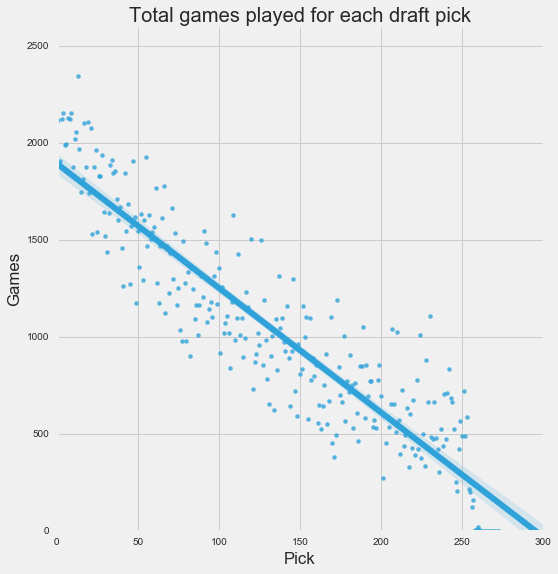

In [10]:
plt.style.use("fivethirtyeight")
sns.lmplot(x="Pick", y="Games", data=df_by_pick,size=8)
plt.ylim(0, 2600)
plt.xlim(0, 300)

sns.plt.title('Total games played for each draft pick')

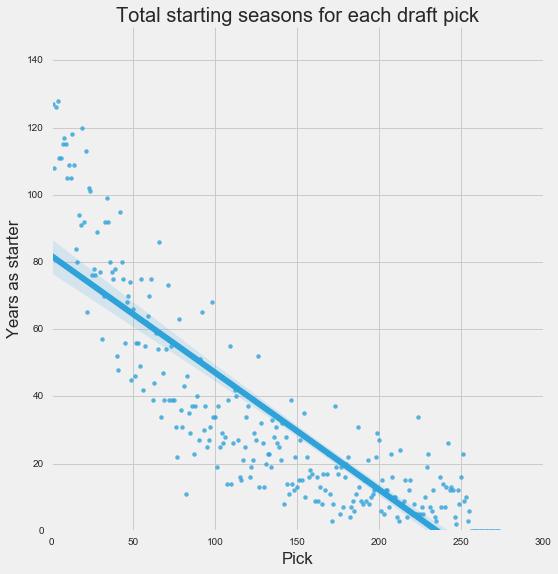

In [11]:
sns.lmplot(x="Pick", y="Years as starter", data=df_by_pick,size=8)
plt.ylim(0, 150)
plt.xlim(0, 300)

plt.style.use("fivethirtyeight")
sns.plt.title('Total starting seasons for each draft pick')

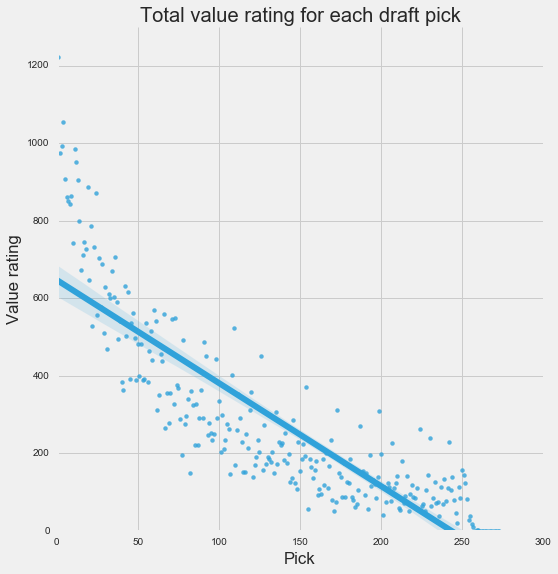

In [12]:
sns.lmplot(x="Pick", y="Value rating", data=df_by_pick,size=8)
plt.ylim(0, 1300)
plt.xlim(0, 300)

plt.style.use("fivethirtyeight")
sns.plt.title('Total value rating for each draft pick')

### Section 3 - Does the "Jimmy Johnson" system work?

Jimmy Johnson, former coach of the Dallas Cowboys, created a point ranking for each draft pick to make it easier for teams to quickly evaluate proposed trades. The top overall pick is equivalent to 3000 points while the last pick in in the draft is equivalent to 2 points. We aim to evaluate if his system has accurately predicted performance.


We adjusted each pick for the "pick value" by dividing 1) Games played and 2) Years as a starter by the point value associated with that pick. In doing this we can think about the "point cost" of a game played or a year as a starter for each pick. If the system worked well we would expect these metrics to be consistent throughout the draft rounds. 

Below two  graphs are displayed:
1) Adjusted games played vs. Draft Position
2) Adjusted years as a starter vs. Draft Position

These two charts tell largely the same story, the ranking system places a premium on early round selection. This could explain why some teams have recently started to consistently trade out of the top rounds to gain many picks in the later rounds. The market (if using this very popular system) is overvaluing high draft picks.


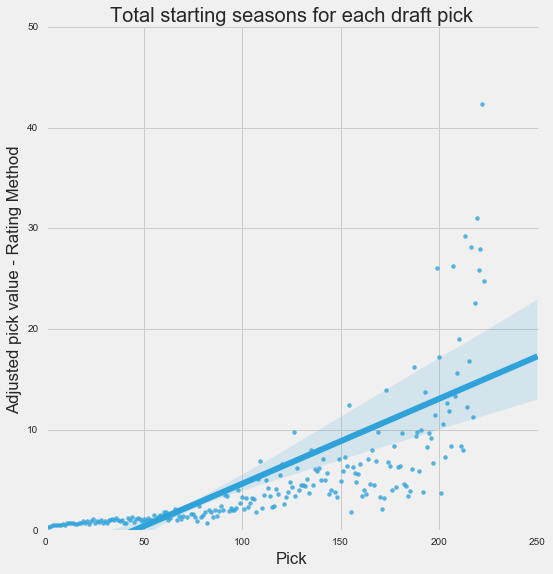

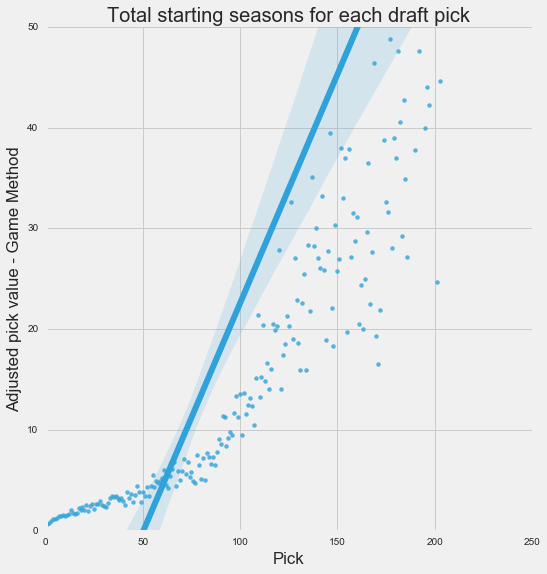

In [13]:
#first we set up a dict of the player conversion values
player_value={"1":"3000","2":"2600","3":"2200","4":"1800","5":"1700","6":"1600","7":"1500","8":"1400",
"9":"1350","10":"1300","11":"1250","12":"1200","13":"1150","14":"1100","15":"1050","16":"1000","17":"950",
"18":"900","19":"875","20":"850","21":"800","22":"780","23":"760","24":"740","25":"720",
"26":"700","27":"680","28":"660","29":"640","30":"620","31":"600","32":"590","33":"580",
"34":"560","35":"550","36":"540","37":"530","38":"520","39":"510","40":"500",
"41":"490","42":"480","43":"470","44":"460","45":"450","46":"440","47":"430","48":"420",
"49":"410","50":"400","51":"390","52":"380","53":"370","54":"360","55":"350","56":"340",
"57":"330","58":"320","59":"310","60":"300","61":"292","62":"284","63":"276","64":"270",
"65":"265","66":"260","67":"255","68":"250","69":"245","70":"240","71":"235","72":"230",
"73":"225","74":"220","75":"215","76":"210","77":"205","78":"200","79":"195","80":"190",
"81":"185","82":"180","83":"175","84":"170","85":"165","86":"160","87":"155","88":"150",
"89":"145","90":"140","91":"136","92":"132","93":"128","94":"124","95":"120","96":"116",
"97":"112","98":"108","99":"104","100":"100","101":"96","102":"92","103":"88","104":"86",
"105":"84","106":"82","107":"80","108":"78","109":"76","110":"74","111":"72","112":"70",
"113":"68","114":"66","115":"64","116":"62","117":"60","118":"58","119":"56","120":"54",
"121":"52","122":"50","123":"49","124":"48","125":"47","126":"46","127":"45","128":"44",
"129":"43","130":"42","131":"41","132":"40","133":"39.5","134":"39","135":"38.5","136":"38",
"137":"37.5","138":"37","139":"36.5","140":"36","141":"35.5","142":"35","143":"34.5","144":"34",
"145":"33.5","146":"33","147":"32.6","148":"32.2","149":"31.8","150":"31.4","151":"31","152":"30.6",
"153":"30.2","154":"29.8","155":"29.4","156":"29","157":"28.6","158":"28.2","159":"27.8","160":"27.4",
"161":"27","162":"26.6","163":"26.2","164":"25.8","165":"25.4",
        "166":"25","167":"24.6","168":"24.2","169":"23.8","170":"23.4","171":"23","172":"22.6",
"173":"22.2","174":"21.8","175":"21.4","176":"21","177":"20.6","178":"20.2","179":"19.8","180":"19.4",
"181":"19","182":"18.6","183":"18.2","184":"17.8","185":"17.4","186":"17","187":"16.6","188":"16.2",
"189":"15.8","190":"15.4","191":"15","192":"14.6","193":"14.2","194":"13.8","195":"13.4","196":"13",
"197":"12.6","198":"12.2","199":"11.8","200":"11.4","201":"11","202":"10.6","203":"10.2","204":"9.8",
"205":"9.4","206":"9","207":"8.6","208":"8.2","209":"7.8","210":"7.4","211":"7","212":"6.6",
"213":"6.2","214":"5.8","215":"5.4","216":"5","217":"4.6","218":"4.2","219":"3.8","220":"3.4",
"221":"3","222":"2.6","223":"2.3","224":"2"}
dict_pick={}
for item in range(1,225):
    dict_pick[item]=(item,df[df.Pick==item].sum()['Games'],df[df.Pick==item].sum()['AP1'],df[df.Pick==item].sum()['Years as starter'],
                     df[df.Pick==item].sum()['Value rating'], float(player_value.get(str(item))))
df_by_pick_JJ=pd.DataFrame.from_dict(dict_pick , orient='index')
df_by_pick_JJ.columns = ["Pick","Games","AP1","Years as starter","Value rating", "JJ pick value"]
df_by_pick_JJ["Adjusted pick value_value rating"] = (df_by_pick_JJ["Value rating"] / df_by_pick_JJ ["JJ pick value"])
df_by_pick_JJ["Adjusted pick value_games"] = (df_by_pick_JJ["Games"] / df_by_pick_JJ ["JJ pick value"])
df_by_pick_JJ.set_index("Pick").head()


sns.lmplot(x="Pick", y="Adjusted pick value_value rating", data=df_by_pick_JJ,size=8)
plt.ylim(0, 50)
plt.xlim(0, 250)
plt.ylabel('Adjusted pick value - Rating Method')
plt.style.use("fivethirtyeight")
sns.plt.title('Total starting seasons for each draft pick')


sns.lmplot(x="Pick", y="Adjusted pick value_games", data=df_by_pick_JJ,size=8)
plt.ylim(0, 50)
plt.xlim(0, 250)
plt.ylabel('Adjusted pick value - Game Method')

plt.style.use("fivethirtyeight")
sns.plt.title('Total starting seasons for each draft pick')

### Section 4 - Does player position impact predictability? 
The team hypothesized that at certain positions, NFL teams are better able to predict future success. 

The first chart shows each pick, sepearated on Y axis by "position" with dots farther to the right indicating on field success and the color indicating the round they were drafted in. The three players that have a value rating above 150 are Tom Brady (Redish dot, drafted late), Peyton Manning and Ray Lewis. This chart was a bit to messy to identify any trends. 

The second graph is a direct test of the team's hypothesis that the success of an Offensive Lineman would be highly predictable while RB/WR would be more difficult to predict. The data does not show this to be the case, if anything the opposite is true. 

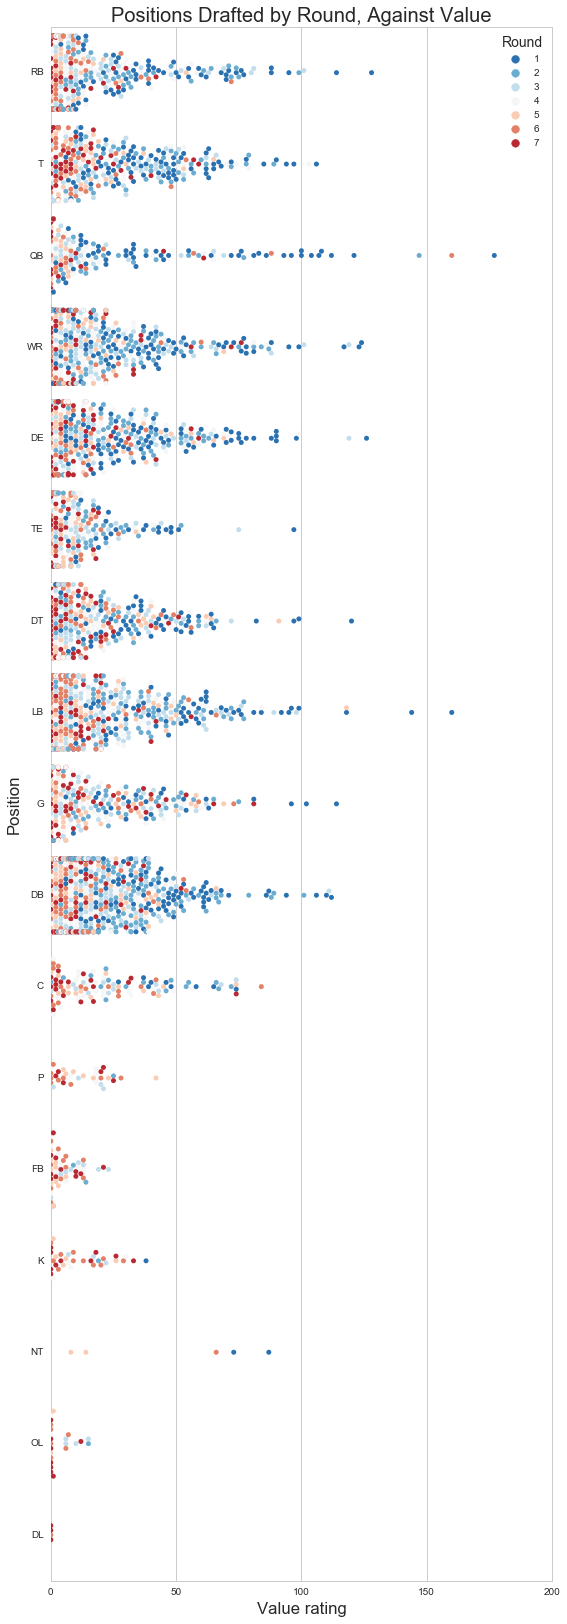

In [15]:
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(8,26))
sns.swarmplot(x="Value rating", y="Position", hue ='Rnd', data=df, palette='RdBu_r')
ax.set_xlim(0,200)
ax.legend(title='Round')
sns.plt.title('Positions Drafted by Round, Against Value')

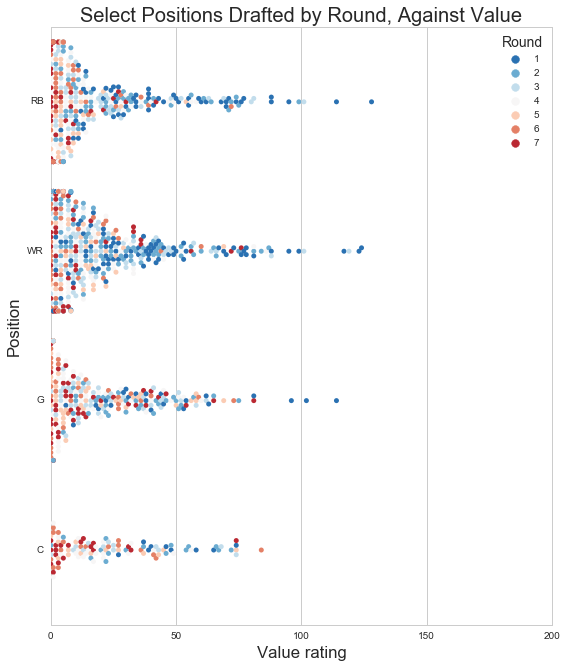

In [16]:
df_skill_line =df.loc[df['Position'].isin(["C", "G", "WR", "RB"])]
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(8,10))
sns.swarmplot(x="Value rating", y="Position", hue ='Rnd', data=df_skill_line, palette='RdBu_r')
ax.set_xlim(0,200)
ax.legend(title="Round")
sns.plt.title('Select Positions Drafted by Round, Against Value')

### Section 5 - How does player age impact draft stock? 


From the the below chart that the majority of draft-picks occur for players who are aged 23, followed by +/- years around that peak. This is expected given that almost all players entering the draft are graduating college seniors.

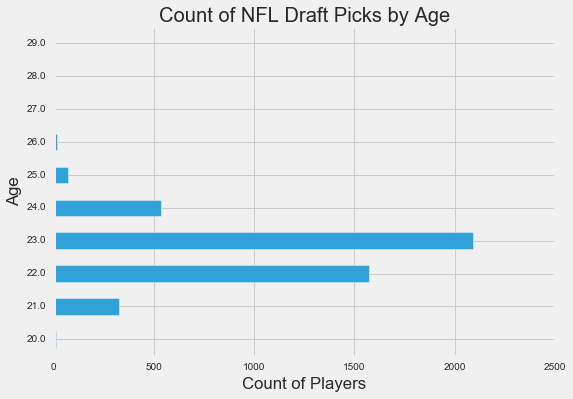

In [17]:
plt.style.use('fivethirtyeight')
df5 = df[['Rnd','Age']]
ax1= df5.groupby(['Age']).count().plot(kind='barh')
ax1.set_title('Count of NFL Draft Picks by Age')
ax1.set_xlabel('Count of Players')
plt.legend('')

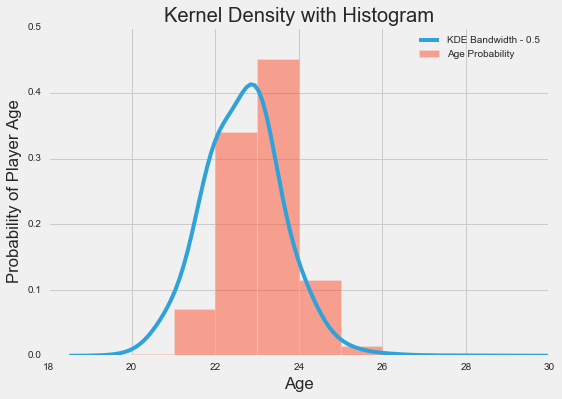

In [18]:
plt.style.use('fivethirtyeight')

bandwidth = .5
fig, ax = plt.subplots()

sns.kdeplot(df5["Age"], bw=bandwidth, ax=ax, label = ('KDE Bandwidth - '+ str(bandwidth)))
ax.hist(df5["Age"], range=(19,30), bins=11, alpha=.5, normed=True, label="Age Probability")
ax.legend()

ax.set_title("Kernel Density with Histogram")
ax.set_xlim(18,30)
ax.set_xlabel('Age')
ax.set_ylabel('Probability of Player Age')
plt.show()

We learn from the below chart that there is a positive relationship between the mean age and round that they are selected in. That this, the average age of players drafted in Round 1 are lower than those drafted in Round 2 and later. This relationship holds consistenly throughout the 7 rounds with a slight plateau in rounds 3 and 6. Otherwise, it is positive throughout. That is, on average, teams pick younger players in the earlier rounds. 

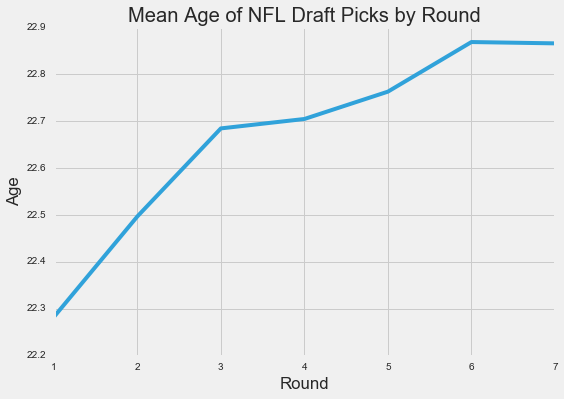

In [19]:
plt.style.use('fivethirtyeight')
df2 = df[['Rnd','Age','Position']]
df2 = df2.groupby('Rnd')
df2 = df2.mean()
df2 = df2.plot(linewidth=4)
df2.set_title ('Mean Age of NFL Draft Picks by Round')

plt.ylabel('Age')
plt.xlabel('Round')
plt.legend('')





We learn from the below chart that the greatest outlier for player value comes from those who were drafted when age 22. This is interesting because in the above Chart 1, we see that teams draft the most players who are age 23 and not age 22. 



(19, 30)

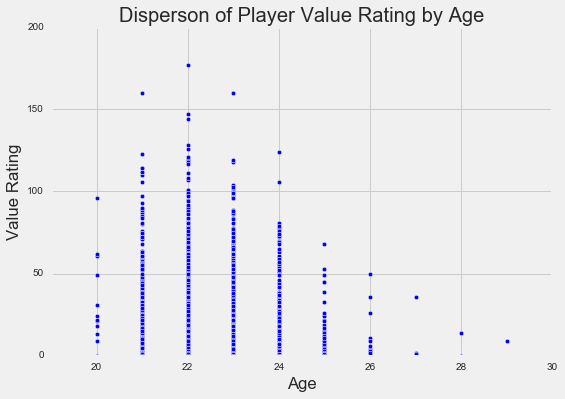

In [20]:
plt.style.use('fivethirtyeight')
df4 = df[['Age','Value rating']]
plt.scatter(df4['Age'],df4['Value rating'])
plt.title('Disperson of Player Value Rating by Age')

plt.ylabel('Value Rating')
plt.xlabel('Age')

plt.ylim(0,200)
plt.xlim(19,30)

### Section 6 - Which team has the best performance in the draft over the last 20 years?

We were curious if any of the teams had managed to outperform in the draft over the length of the data set. To accommplish this we decided to look at the total number of games played by players drafted by each team, the total value ranking of those players, and the number of All Pro seasons that players on those teams had. We expected that some teams that had a consistent record of high performance over this time span would likely have higher scores, compared to others which are notoriously bad getting low ones.

Our expectations were confirmed. The Green Bay Packers, New England Patriots and Pittsburgh Steelers had the highest total normalized scores for Pick Value and Games Played. All three teams have also done consistently well in the NFL over this time period. As a rough measure, the three teams have collectively appeared in 13 Super Bowls in the time span versus an expected 3.75 if they performed at average (3/32 teams, multipled by 20 Super Bowls and 2 Teams per Super Bowl). Conversely the Cleveland Browns, a team often considered the laughing stock of the NFL, had the worst performance in the NFL draft by this metric. 

Teams that did well overall in the picks didn't nessecarily do well in choosing players would get All Pro nominations. This implies that finding players who will be superstars is harder to predict than those who will be consistent but not exceptional players.

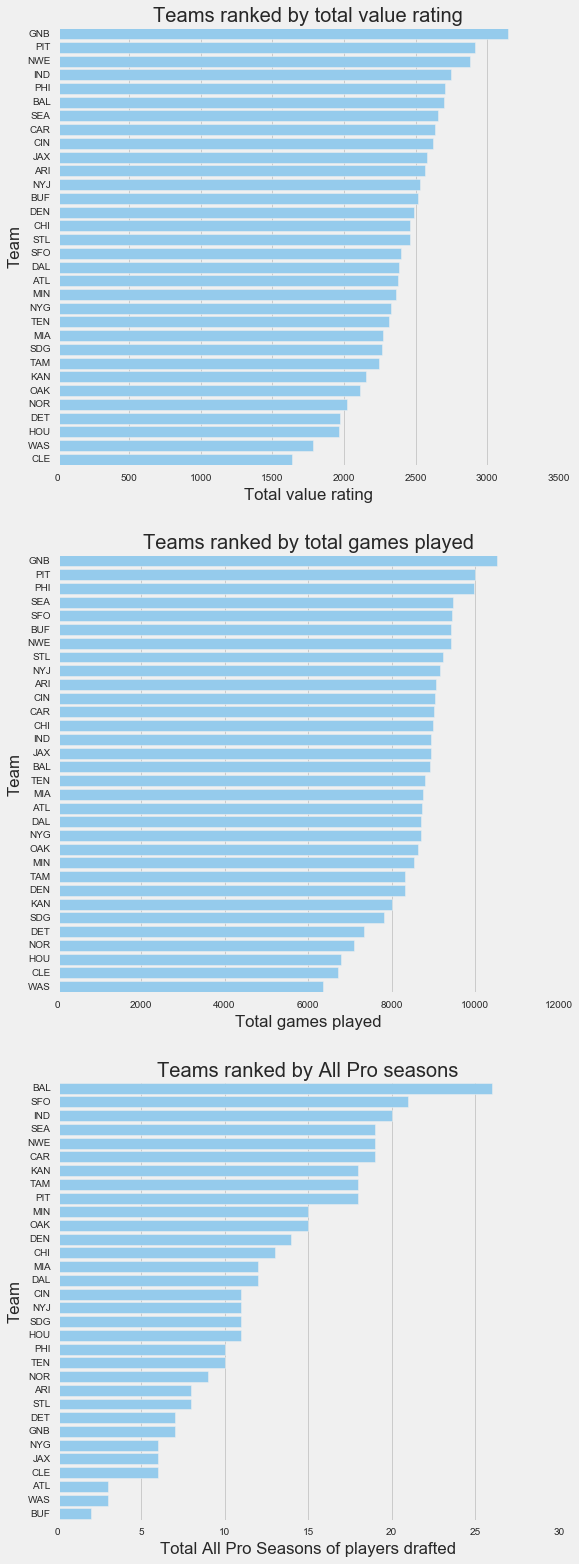

In [21]:
# Create a list of teams by their city abbreviations
team_list = ("ARI","ATL","BAL","BUF","CAR","CHI","CIN","CLE","DAL","DEN","DET",
             "GNB","HOU","IND","JAX","KAN","MIA","MIN","NOR","NWE","NYG","NYJ",
             "OAK","PHI","PIT","SDG","SFO","SEA","STL","TAM","TEN","WAS")
team_dict = {}

# Summarize data for each team
for item in team_list:
    team_dict[item]=(item,df[df.Team==item].sum()['Games'],df[df.Team==item].sum()['AP1'],df[df.Team==item].sum()['Years as starter']
          ,df[df.Team==item].sum()['Value rating'])
df_by_team=pd.DataFrame.from_dict(team_dict , orient='index')
df_by_team.columns = ["Team","Games","AP1","Years as starter","Value rating"]

# Set the plot style and create subplots
plt.style.use('fivethirtyeight')
f, (ax1, ax2, ax3) = plt.subplots(3, figsize=(8, 25), sharex=False)

# Sort the teams by value rating
df_by_team = df_by_team.sort_values(by='Value rating', ascending=False)
sns.barplot(x="Value rating", y='Team', data=df_by_team, ax=ax1, orient="h", color='lightskyblue')
ax1.set_title('Teams ranked by total value rating')
ax1.set_xlabel('Total value rating')

# Sort the teams by total games played
df_by_team = df_by_team.sort_values(by='Games', ascending=False)
sns.barplot(x="Games", y='Team', data=df_by_team, ax=ax2, orient="h", color='lightskyblue')
ax2.set_title('Teams ranked by total games played')
ax2.set_xlabel('Total games played')

# Sort the teams by All Pro Seasons
df_by_team = df_by_team.sort_values(by='AP1', ascending=False)
sns.barplot(x="AP1", y='Team', data=df_by_team, ax=ax3, orient="h", color='lightskyblue')
ax3.set_title('Teams ranked by All Pro seasons')
ax3.set_xlabel('Total All Pro Seasons of players drafted')

In [25]:
# For each team, divide the number of games, value rating and AP1 by the average to arrive at a normalized score to make
# them directly comparable

#Assign different weights to the norms based on preference

Norm_Games_weight = .5
Norm_Value_weight = .5
Norm_AP1_weight = 0

df_by_team['Norm Games'] = df_by_team['Games'] / df_by_team['Games'].describe(percentiles=[.5])[1]
df_by_team['Norm Value'] = df_by_team['Value rating'] / df_by_team['Value rating'].describe(percentiles=[.5])[1]
df_by_team['Norm AP1'] = df_by_team['AP1'] / df_by_team['AP1'].describe(percentiles=[.5])[1]
df_by_team['Total Norms'] = df_by_team['Norm Games']*Norm_Games_weight+df_by_team['Norm Value']*Norm_Value_weight+df_by_team['Norm AP1']*Norm_AP1_weight

#Sort by total norm score
df_by_team = df_by_team.sort_values(by='Total Norms', ascending=True)

xGames = dict(type="bar",                                      # trace type
           orientation="h",                                 # make bars horizontal
           name="Games",                                      # legend entry
           x=df_by_team["Norm Games"],                               # x data
           y=df_by_team.index,                                # y data
           marker={"color": "Blue"}                         # blue bars
          )

xValues = dict(type="bar",                                    # trace type
             orientation="h",                               # horizontal bars
             name="Value",                                  # legend entry
             x=df_by_team["Norm Value"],                           # x data
             y=df_by_team.index,                              # y data
             marker={"color": "Red"}                       # pink bars
            )

xAP1 = dict(type="bar",                                    # trace type
             orientation="h",                               # horizontal bars
             name="AP1",                                  # legend entry
             x=df_by_team["Norm AP1"],                           # x data
             y=df_by_team.index,                              # y data             
             marker={"color": "Green"}                       # pink bars
             )

layout = dict(width=650, height=750,                             # plot width/height
              yaxis={"title": "Team"},                          # yaxis label
              title="NFL Team Draft Performance",                # title
              xaxis={"title": "Normalized Performance Metrics"}  # xaxis label}
             )

iplot(go.Figure(data=[xGames, xValues, xAP1], layout=layout))

## Are some teams better than others at picking late round players?

Following up on the previous question, we wanted to know if those teams which were doing well were picking high performance late round players. To find this, we chose a swarmplot showing every player drafted over the last 20 years by team, with the hue indiciating the round they were picked in. The X axis shows player value, any player over 50 is very good, over 100 is a likely hall of famers, and over 150 is 'legendary'. 

We were able to identify some of the players on the chart just by knowing their draft round, team and score. Tom Brady stands out as a 6th round draft pick, the only late round player with a score over 150. As does Zach Thomas, a 5th rounder also over 100. Peyton Manning, the highest value rated player in the data set was the number 1 pick in his year, so at least some of the time teams get it right! 

Turning back to our question of team performance we can see that all three teams with high draft performance have an unusually high number of 5th, 6th and 7th round players above the 100 point cutoff. Green Bay has 5(!) 7th rounders over 100, and 2 6th. Pittsburgh has two of each, and New England has Tom Brady.  

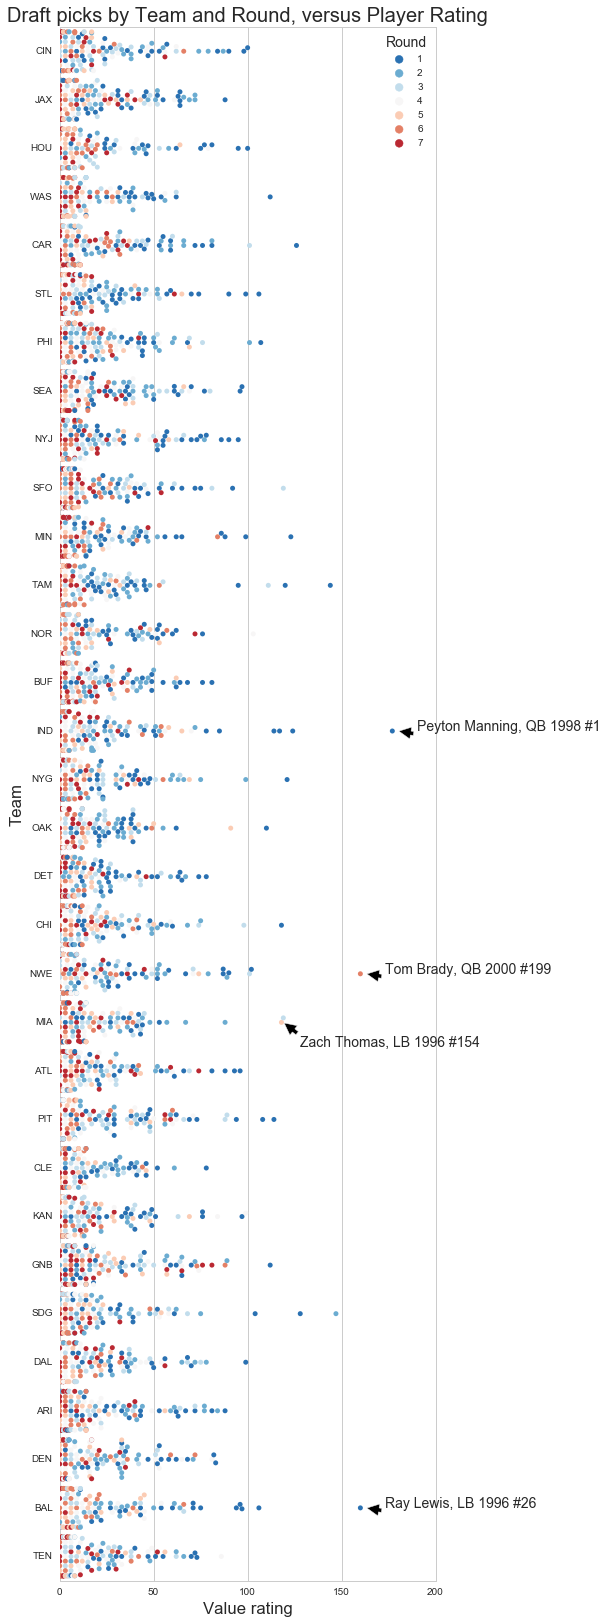

In [22]:
# Do teams have an advantage in picking good players in certain rounds?
sns.set_style("whitegrid")

f, ax = plt.subplots(figsize=(6,26))
sns.swarmplot(x="Value rating", y="Team", hue ='Rnd', data=df, size = 5, palette='RdBu_r')
ax.set_xlim(0,200)
ax.legend(title='Round')

ax.annotate('Tom Brady, QB 2000 #199', xy=(163, 19), xytext=(173, 19),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
ax.annotate('Peyton Manning, QB 1998 #1', xy=(180, 14), xytext=(190, 14),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
ax.annotate('Ray Lewis, LB 1996 #26', xy=(163, 30), xytext=(173, 30),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
ax.annotate('Zach Thomas, LB 1996 #154', xy=(119, 20), xytext=(128, 20.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
sns.plt.title('Draft picks by Team and Round, versus Player Rating')

## How do teams drafting strategies vary by position?

We were curious if some teams preferred to draft different positions in different orders. A violin plot split by team, and allowing different positions to be be checked seemed like a good way to go about this. You can adjust the chart by adding or removing positions to pos_pick, and pick any two teams using the city codes.

In the example below we can see that New England often chooses later round picks for Quater Backs, compared to Cleveland that has selected no less than 4 first round quaterbacks over the last twenty years (not that it did them much good). Conversley, New England has picked a lot of Defensive Ends early, compared to Cleveland picking them mostly in the 6th and 7th rounds. Their strategies for Running Backs are similar.

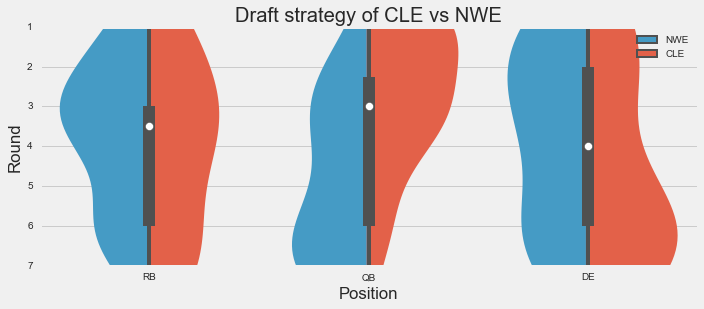

In [23]:
#How do teams drafting strategies change by position?
#pos_list  = ("QB","RB","DT","LB","WR","T","DB","K","G","TE","DE","NT","C","P","NT","FB","OL","DL")

#team_list = ("ARI","ATL","BAL","BUF","CAR","CHI","CIN","CLE","DAL","DEN","DET",
#             "GNB","HOU","IND","JAX","KAN","MIA","MIN","NOR","NWE","NYG","NYJ",
#             "OAK","PHI","PIT","SDG","SFO","SEA","STL","TAM","TEN","WAS")


plt.style.use('fivethirtyeight')
pos_pick = ["QB", "DE", "RB"]        #pick positions to compare
team12 = ["CLE", "NWE"]              #pick two teams to compare

plot_width = len(pos_pick) * 3.5

df_compare = df[df['Position'].isin(pos_pick) & df['Team'].isin(team12)]

f, ax = plt.subplots(figsize=(plot_width,4))
sns.violinplot(x = "Position", y="Rnd", data=df_compare, hue="Team", split=True)
ax.set_ylim(7,1)
ax.set_ylabel('Round')
ax.legend(loc=0)
sns.plt.title('Draft strategy of '+team12[0]+' vs '+team12[1])